### R Photos

In [2]:
library(tidyverse)
library(ggrepel)
library(ggplot2)
library(gt)
library(dplyr, warn.conflicts = FALSE)
options(nflreadr.verbose = FALSE)
library(cfbplotR)
library(hms)

### Thursday's Games

In [17]:
thursday <- read_csv('thursday.csv', show_col_types=FALSE)
thursday$time <- as.character(thursday$time)
thursday$time <- sub(":00$", "", thursday$time)

New names:
• `` -> `...1`


In [19]:
thursday

...1,home_team,away_team,total_line,TPAPG,TPPG,gameday,prediction,pred-actual,prob_correct_pred,time
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>
12,UTEP,Florida International,47.0,63.00,43.00,2024-10-17,49.5,2.5,0.860,NA
17,Marshall,Georgia State,51.5,56.73,50.57,2024-10-17,50.5,-1.0,0.273,16:00
19,Virginia Tech,Boston College,48.5,39.83,57.67,2024-10-17,47.0,-1.5,0.211,16:30


In [20]:
t <- ggplot(thursday, aes(x = prediction, y = home_team)) +
    geom_segment(aes(
    x = pmin(total_line, prediction),
    xend = pmax(total_line, prediction),
    y = home_team,
    yend = home_team,
    color = ifelse(prediction > total_line, "Bet Over", "Bet Under")
    ), linewidth = 2.5, alpha = 0.75) +
    geom_point(aes(color = "Prediction"), size = 3) +
    geom_point(aes(x = total_line, y = home_team, color = "Total Line"), size = 3) +
    geom_text(aes(x = prediction, y = home_team, label = round(prediction, 1)),
            color = "black", vjust = -1, size = 3) +
    geom_text(aes(x = total_line, y = home_team, label = round(total_line, 1)),
            color = "#b8860b", vjust = 2, size = 3) +
    
    # Use cfbplotR logos instead of nflplotR logos
    geom_cfb_logos(aes(x = min(total_line) - 10, team = home_team),
                 width = 0.08, height = 0.08) +
    geom_cfb_logos(aes(x = min(total_line) - 7.95, team = away_team),
                 width = 0.08, height = 0.08) +
    geom_text(aes(x = min(total_line) - 4.65, y = home_team, label = time),
            data = thursday, color = "blue", hjust = 1, size = 4.5, fontface="bold") +
    
    geom_text(aes(x = max(total_line, prediction) + 2,
                y = home_team,
                label = sprintf("%.1f%% Conf.", prob_correct_pred * 100)),
            data = thursday, color = "black", hjust = 0, size = 3) +
    
    labs(
    title = "Prediction vs. Over Under Line: CFB Thursday Games",
    x = "Total Points",
    y = NULL,
    color = NULL
    ) +
    scale_color_manual(values = c("Prediction" = "black", "Total Line" = "#b8860b",
                                "Bet Over" = "midnightblue", "Bet Under" = "darkred")) +
    scale_x_continuous(
    breaks = seq(30, max(thursday$total_line, thursday$prediction) + 4, by = 2.5),
    limits = c(min(thursday$total_line) - 10, max(thursday$total_line, thursday$prediction) + 4)
    ) +
    theme_minimal() +
    theme(
    axis.text.y = element_blank(),
    panel.background = element_rect(fill = "grey95", color = "grey95"),
    plot.background = element_rect(fill = "white", color = "white"),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_line(color = "gray90"),
    legend.position = "bottom",
    plot.title = element_text(hjust = 0.5)
    )

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."


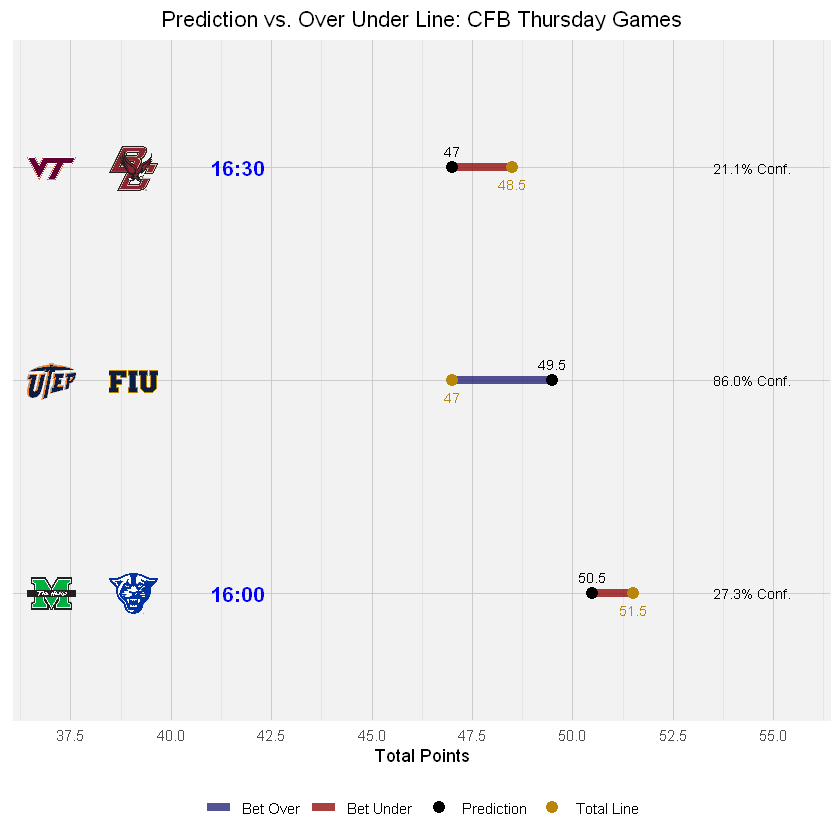

In [21]:
t
ggsave("thursday.png", plot=t, width=10, height=8, dpi=300)

### Friday

In [22]:
friday <- read_csv('friday.csv', show_col_types=FALSE)
friday$time <- as.character(friday$time)
friday$time <- sub(":00$", "", friday$time)

New names:
• `` -> `...1`


In [23]:
friday

...1,home_team,away_team,total_line,TPAPG,TPPG,gameday,prediction,pred-actual,prob_correct_pred,time
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>
3,Purdue,Oregon,60.0,59.40,60.27,2024-10-18,57.5,-2.5,0.667,05:00
21,Duke,Florida State,42.5,42.83,41.17,2024-10-18,40.5,-2.0,0.086,16:00
31,Nevada,Fresno State,50.0,54.64,56.12,2024-10-18,52.0,2.0,0.740,19:30
34,BYU,Oklahoma State,52.5,44.17,63.17,2024-10-18,51.5,-1.0,0.373,19:15


In [68]:
f <- ggplot(friday, aes(x = prediction, y = home_team)) +
    geom_segment(aes(
    x = pmin(total_line, prediction),
    xend = pmax(total_line, prediction),
    y = home_team,
    yend = home_team,
    color = ifelse(prediction > total_line, "Bet Over", "Bet Under")
    ), linewidth = 2.5, alpha = 0.75) +
    geom_point(aes(color = "Prediction"), size = 3) +
    geom_point(aes(x = total_line, y = home_team, color = "Total Line"), size = 3) +
    geom_text(aes(x = prediction, y = home_team, label = round(prediction, 1)),
            color = "black", vjust = -1, size = 3) +
    geom_text(aes(x = total_line, y = home_team, label = round(total_line, 1)),
            color = "#b8860b", vjust = 2, size = 3) +
    
    # Use cfbplotR logos instead of nflplotR logos
    geom_cfb_logos(aes(x = min(total_line) - 10, team = home_team),
                 width = 0.08, height = 0.08) +
    geom_cfb_logos(aes(x = min(total_line) - 7.95, team = away_team),
                 width = 0.08, height = 0.08) +
    geom_text(aes(x = min(total_line) - 3, y = home_team, label = time),
            data = friday, color = "blue", hjust = 1, size = 4.5, fontface="bold") +
    
    geom_text(aes(x = max(total_line, prediction) + 2,
                y = home_team,
                label = sprintf("%.1f%% Conf.", prob_correct_pred * 100)),
            data = friday, color = "black", hjust = 0, size = 3) +
    
    labs(
    title = "Prediction vs. Over Under Line: CFB Friday Games",
    x = "Total Points",
    y = NULL,
    color = NULL
    ) +
    scale_color_manual(values = c("Prediction" = "black", "Total Line" = "#b8860b",
                                "Bet Over" = "midnightblue", "Bet Under" = "darkred")) +
    scale_x_continuous(
    breaks = seq(30, max(friday$total_line, friday$prediction) + 4, by = 2.5),
    limits = c(min(friday$total_line) - 10, max(friday$total_line, friday$prediction) + 4)
    ) +
    theme_minimal() +
    theme(
    axis.text.y = element_blank(),
    panel.background = element_rect(fill = "grey95", color = "grey95"),
    plot.background = element_rect(fill = "white", color = "white"),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_line(color = "gray90"),
    legend.position = "bottom",
    plot.title = element_text(hjust = 0.5)
    )

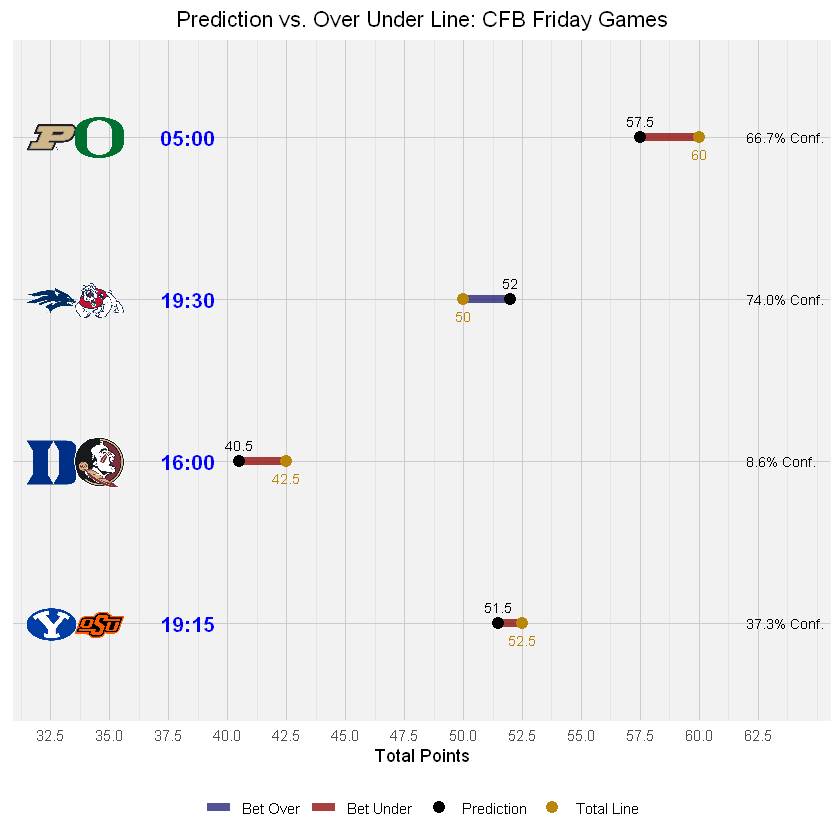

In [69]:
f
ggsave("friday.png", plot=f, width=10, height=8, dpi=300)

### Saturday

In [26]:
saturday_one <- read_csv('saturday_one.csv', show_col_types=FALSE)
saturday_one$time <- as.character(saturday_one$time)
saturday_one$time <- sub(":00$", "", saturday_one$time)

New names:
• `` -> `...1`


In [48]:
saturday_one

...1,home_team,away_team,total_line,TPAPG,TPPG,gameday,prediction,pred-actual,prob_correct_pred,time
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<chr>
47,Coastal Carolina,Louisiana,57.5,56.37,66.17,2024-10-19,58.0,0.5,0.516,09:00
29,Army,East Carolina,51.0,35.07,65.70,2024-10-19,49.0,-2.0,0.247,09:00
18,Cincinnati,Arizona State,50.5,43.17,63.17,2024-10-19,50.5,0.0,NA,09:00
40,Indiana,Nebraska,51.0,26.17,75.50,2024-10-19,48.5,-2.5,0.247,09:00
14,Louisville,Miami,59.5,38.50,83.83,2024-10-19,58.0,-1.5,0.534,09:00
35,Missouri,Auburn,51.0,36.17,63.50,2024-10-19,47.5,-3.5,0.247,09:00
9,UConn,Wake Forest,55.5,59.87,60.23,2024-10-19,56.0,0.5,0.600,09:00
5,Rutgers,UCLA,40.0,48.67,40.17,2024-10-19,42.5,2.5,1.000,09:00
2,Northwestern,Wisconsin,41.5,39.00,51.67,2024-10-19,44.0,2.5,1.000,09:00


In [56]:
saturday_one$time <- ifelse(is.na(saturday_one$time), "00:00", saturday_one$time)
saturday_one$time <- format(as.POSIXct(saturday_one$time, format = "%H:%M"), "%H:%M")
saturday_one$numeric_time <- as.numeric(substr(saturday_one$time, 1, 2)) +
                             as.numeric(substr(saturday_one$time, 4, 5)) / 60
saturday_one$home_team <- reorder(saturday_one$home_team, -saturday_one$numeric_time)

s_one <- ggplot(saturday_one, aes(x = prediction, y = home_team)) +
    geom_segment(aes(
    x = pmin(total_line, prediction),
    xend = pmax(total_line, prediction),
    y = home_team,
    yend = home_team,
    color = ifelse(prediction > total_line, "Bet Over", "Bet Under")
    ), linewidth = 2.5, alpha = 0.75) +
    geom_point(aes(color = "Prediction"), size = 3) +
    geom_point(aes(x = total_line, y = home_team, color = "Total Line"), size = 3) +
    geom_text(aes(x = prediction, y = home_team, label = round(prediction, 1)),
            color = "black", vjust = -1, size = 3) +
    geom_text(aes(x = total_line, y = home_team, label = round(total_line, 1)),
            color = "#b8860b", vjust = 2, size = 3) +
    
    # Use cfbplotR logos instead of nflplotR logos
    geom_cfb_logos(aes(x = min(total_line) - 10, team = home_team),
                 width = 0.06, height = 0.06) +
    geom_cfb_logos(aes(x = min(total_line) - 7.95, team = away_team),
                 width = 0.06, height = 0.06) +
    geom_text(aes(x = min(total_line) - 4.35, y = home_team, label = time),
            data = saturday_one, color = "blue", hjust = 1, size = 3.75, fontface="bold") +
    
    geom_text(aes(x = max(total_line, prediction) + 2,
                y = home_team,
                label = sprintf("%.1f%% Conf.", prob_correct_pred * 100)),
            data = saturday_one, color = "black", hjust = 0, size = 3) +
    
    labs(
    title = "Prediction vs. Over Under Line: CFB Saturday Games",
    x = "Total Points",
    y = NULL,
    color = NULL
    ) +
    scale_color_manual(values = c("Prediction" = "black", "Total Line" = "#b8860b",
                                "Bet Over" = "midnightblue", "Bet Under" = "darkred")) +
    scale_x_continuous(
    breaks = seq(30, max(saturday_one$total_line, saturday_one$prediction) + 4, by = 2.5),
    limits = c(min(saturday_one$total_line) - 10, max(saturday_one$total_line, saturday_one$prediction) + 4)
    ) +
    theme_minimal() +
    theme(
    axis.text.y = element_blank(),
    panel.background = element_rect(fill = "grey95", color = "grey95"),
    plot.background = element_rect(fill = "white", color = "white"),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_line(color = "gray90"),
    legend.position = "bottom",
    plot.title = element_text(hjust = 0.5)
    )

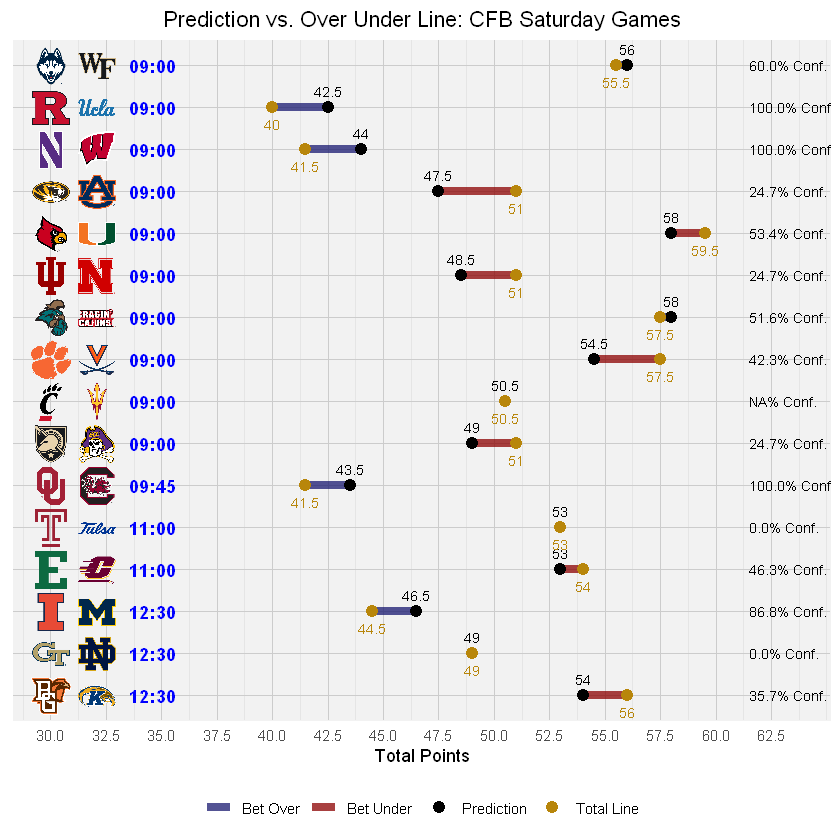

In [57]:
s_one
ggsave("saturday_one.png", plot=s_one, width=10, height=8, dpi=300)

In [38]:
saturday_two <- read_csv('saturday_two.csv', show_col_types=FALSE)
saturday_two$time <- as.character(saturday_two$time)
saturday_two$time <- sub(":00$", "", saturday_two$time)

New names:
• `` -> `...1`


In [58]:
saturday_two$time <- ifelse(is.na(saturday_two$time), "00:00", saturday_two$time)
saturday_two$time <- format(as.POSIXct(saturday_two$time, format = "%H:%M"), "%H:%M")
saturday_two$numeric_time <- as.numeric(substr(saturday_two$time, 1, 2)) +
                             as.numeric(substr(saturday_two$time, 4, 5)) / 60
saturday_two$home_team <- reorder(saturday_two$home_team, -saturday_two$numeric_time)

s_two <- ggplot(saturday_two, aes(x = prediction, y = home_team)) +
    geom_segment(aes(
    x = pmin(total_line, prediction),
    xend = pmax(total_line, prediction),
    y = home_team,
    yend = home_team,
    color = ifelse(prediction > total_line, "Bet Over", "Bet Under")
    ), linewidth = 2.5, alpha = 0.75) +
    geom_point(aes(color = "Prediction"), size = 3) +
    geom_point(aes(x = total_line, y = home_team, color = "Total Line"), size = 3) +
    geom_text(aes(x = prediction, y = home_team, label = round(prediction, 1)),
            color = "black", vjust = -1, size = 3) +
    geom_text(aes(x = total_line, y = home_team, label = round(total_line, 1)),
            color = "#b8860b", vjust = 2, size = 3) +
    
    # Use cfbplotR logos instead of nflplotR logos
    geom_cfb_logos(aes(x = min(total_line) - 10, team = home_team),
                 width = 0.06, height = 0.06) +
    geom_cfb_logos(aes(x = min(total_line) - 7.95, team = away_team),
                 width = 0.06, height = 0.06) +
    geom_text(aes(x = min(total_line) - 4.35, y = home_team, label = time),
            data = saturday_two, color = "blue", hjust = 1, size = 3.75, fontface="bold") +
    
    geom_text(aes(x = max(total_line, prediction) + 2,
                y = home_team,
                label = sprintf("%.1f%% Conf.", prob_correct_pred * 100)),
            data = saturday_two, color = "black", hjust = 0, size = 3) +
    
    labs(
    title = "Prediction vs. Over Under Line: CFB Saturday Games",
    x = "Total Points",
    y = NULL,
    color = NULL
    ) +
    scale_color_manual(values = c("Prediction" = "black", "Total Line" = "#b8860b",
                                "Bet Over" = "midnightblue", "Bet Under" = "darkred")) +
    scale_x_continuous(
    breaks = seq(30, max(saturday_two$total_line, saturday_two$prediction) + 4, by = 2.5),
    limits = c(min(saturday_two$total_line) - 10, max(saturday_two$total_line, saturday_two$prediction) + 4)
    ) +
    theme_minimal() +
    theme(
    axis.text.y = element_blank(),
    panel.background = element_rect(fill = "grey95", color = "grey95"),
    plot.background = element_rect(fill = "white", color = "white"),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_line(color = "gray90"),
    legend.position = "bottom",
    plot.title = element_text(hjust = 0.5)
    )

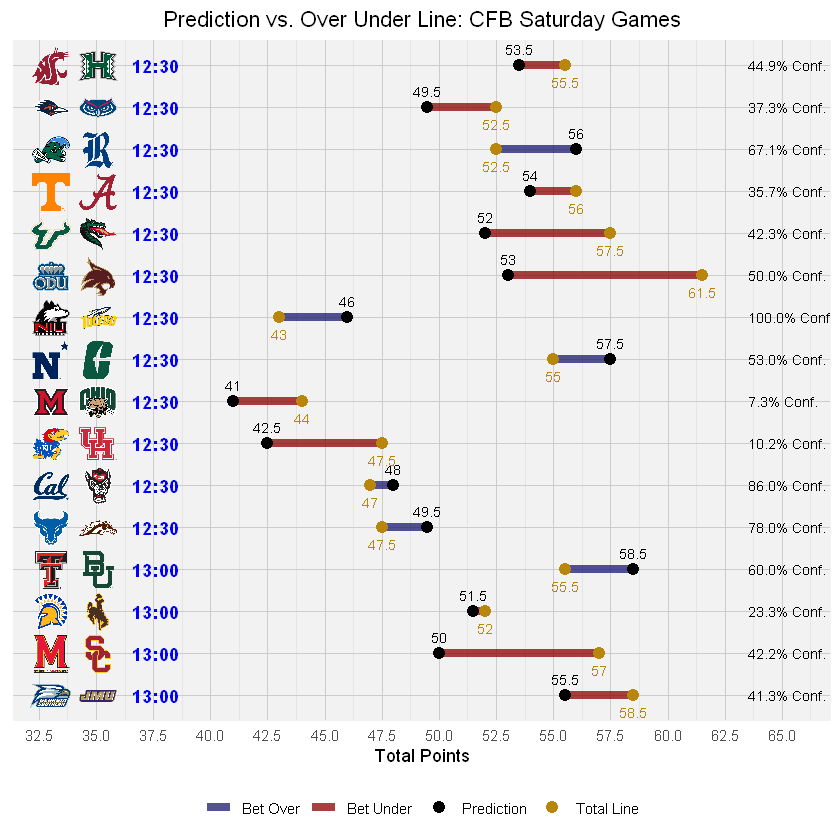

In [59]:
s_two
ggsave("saturday_two.png", plot=s_two, width=10, height=8, dpi=300)

In [41]:
saturday_three <- read_csv('saturday_three.csv', show_col_types=FALSE)
saturday_three$time <- as.character(saturday_three$time)
saturday_three$time <- sub(":00$", "", saturday_three$time)

New names:
• `` -> `...1`


In [66]:
saturday_three$time <- ifelse(is.na(saturday_three$time), "00:00", saturday_three$time)
saturday_three$time <- format(as.POSIXct(saturday_three$time, format = "%H:%M"), "%H:%M")
saturday_three$numeric_time <- as.numeric(substr(saturday_three$time, 1, 2)) +
                               as.numeric(substr(saturday_three$time, 4, 5)) / 60
saturday_three$home_team <- reorder(saturday_three$home_team, -saturday_three$numeric_time)

s_three <- ggplot(saturday_three, aes(x = prediction, y = home_team)) +
    geom_segment(aes(
    x = pmin(total_line, prediction),
    xend = pmax(total_line, prediction),
    y = home_team,
    yend = home_team,
    color = ifelse(prediction > total_line, "Bet Over", "Bet Under")
    ), linewidth = 2.5, alpha = 0.75) +
    geom_point(aes(color = "Prediction"), size = 3) +
    geom_point(aes(x = total_line, y = home_team, color = "Total Line"), size = 3) +
    geom_text(aes(x = prediction, y = home_team, label = round(prediction, 1)),
            color = "black", vjust = -1, size = 3) +
    geom_text(aes(x = total_line, y = home_team, label = round(total_line, 1)),
            color = "#b8860b", vjust = 2, size = 3) +
    
    # Use cfbplotR logos instead of nflplotR logos
    geom_cfb_logos(aes(x = min(total_line) - 10, team = home_team),
                 width = 0.06, height = 0.06) +
    geom_cfb_logos(aes(x = min(total_line) - 6.95, team = away_team),
                 width = 0.06, height = 0.06) +
    geom_text(aes(x = min(total_line) - 2, y = home_team, label = time),
            data = saturday_three, color = "blue", hjust = 1, size = 3.75, fontface="bold") +
    
    geom_text(aes(x = max(total_line, prediction) + 2,
                y = home_team,
                label = sprintf("%.1f%% Conf.", prob_correct_pred * 100)),
            data = saturday_three, color = "black", hjust = 0, size = 3) +
    
    labs(
    title = "Prediction vs. Over Under Line: CFB Saturday Games",
    x = "Total Points",
    y = NULL,
    color = NULL
    ) +
    scale_color_manual(values = c("Prediction" = "black", "Total Line" = "#b8860b",
                                "Bet Over" = "midnightblue", "Bet Under" = "darkred")) +
    scale_x_continuous(
    breaks = seq(30, max(saturday_three$total_line, saturday_three$prediction) + 4, by = 2.5),
    limits = c(min(saturday_three$total_line) - 10, max(saturday_three$total_line, saturday_three$prediction) + 4)
    ) +
    theme_minimal() +
    theme(
    axis.text.y = element_blank(),
    panel.background = element_rect(fill = "grey95", color = "grey95"),
    plot.background = element_rect(fill = "white", color = "white"),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_line(color = "gray90"),
    legend.position = "bottom",
    plot.title = element_text(hjust = 0.5)
    )

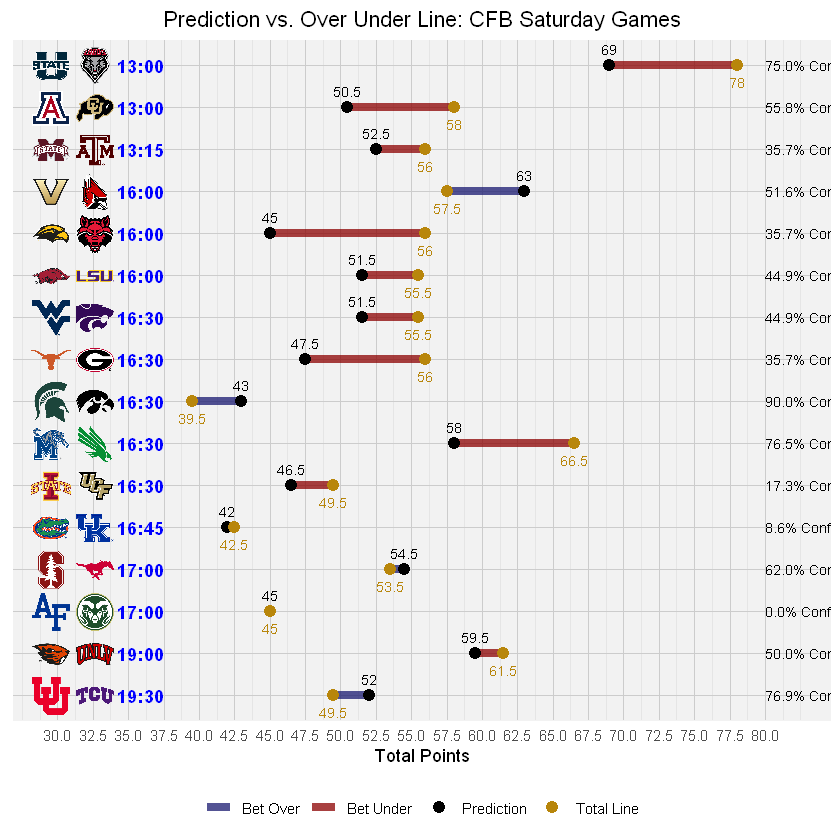

In [67]:
s_three
ggsave("saturday_three.png", plot=s_three, width=10, height=8, dpi=300)

In [80]:
my_one <- read_csv('my_bets_one.csv', show_col_types=FALSE)
my_one$time <- as.character(my_one$time)
my_one$time <- sub(":00$", "", my_one$time)

New names:
• `` -> `...1`


In [81]:
my_one$time <- ifelse(is.na(my_one$time), "00:00", my_one$time)
my_one$time <- format(as.POSIXct(my_one$time, format = "%H:%M"), "%H:%M")
my_one$numeric_time <- as.numeric(substr(my_one$time, 1, 2)) +
                               as.numeric(substr(my_one$time, 4, 5)) / 60
my_one$home_team <- reorder(my_one$home_team, -my_one$numeric_time)

my_bets_one <- ggplot(my_one, aes(x = prediction, y = home_team)) +
    geom_segment(aes(
    x = pmin(total_line, prediction),
    xend = pmax(total_line, prediction),
    y = home_team,
    yend = home_team,
    color = ifelse(prediction > total_line, "Bet Over", "Bet Under")
    ), linewidth = 2.5, alpha = 0.75) +
    geom_point(aes(color = "Prediction"), size = 3) +
    geom_point(aes(x = total_line, y = home_team, color = "Total Line"), size = 3) +
    geom_text(aes(x = prediction, y = home_team, label = round(prediction, 1)),
            color = "black", vjust = -1, size = 3) +
    geom_text(aes(x = total_line, y = home_team, label = round(total_line, 1)),
            color = "#b8860b", vjust = 2, size = 3) +
    
    # Use cfbplotR logos instead of nflplotR logos
    geom_cfb_logos(aes(x = min(total_line) - 10, team = home_team),
                 width = 0.06, height = 0.06) +
    geom_cfb_logos(aes(x = min(total_line) - 6.95, team = away_team),
                 width = 0.06, height = 0.06) +
    geom_text(aes(x = min(total_line) - 2, y = home_team, label = time),
            data = my_one, color = "blue", hjust = 1, size = 3.75, fontface="bold") +
    
    geom_text(aes(x = max(total_line, prediction) + 2,
                y = home_team,
                label = sprintf("%.1f%% Conf.", prob_correct_pred * 100)),
            data = my_one, color = "black", hjust = 0, size = 3) +
    
    labs(
    title = "Prediction vs. Over Under Line: CFB My Bets",
    x = "Total Points",
    y = NULL,
    color = NULL
    ) +
    scale_color_manual(values = c("Prediction" = "black", "Total Line" = "#b8860b",
                                "Bet Over" = "midnightblue", "Bet Under" = "darkred")) +
    scale_x_continuous(
    breaks = seq(30, max(my_one$total_line, my_one$prediction) + 4, by = 2.5),
    limits = c(min(my_one$total_line) - 10, max(my_one$total_line, my_one$prediction) + 4)
    ) +
    theme_minimal() +
    theme(
    axis.text.y = element_blank(),
    panel.background = element_rect(fill = "grey95", color = "grey95"),
    plot.background = element_rect(fill = "white", color = "white"),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_line(color = "gray90"),
    legend.position = "bottom",
    plot.title = element_text(hjust = 0.5)
    )

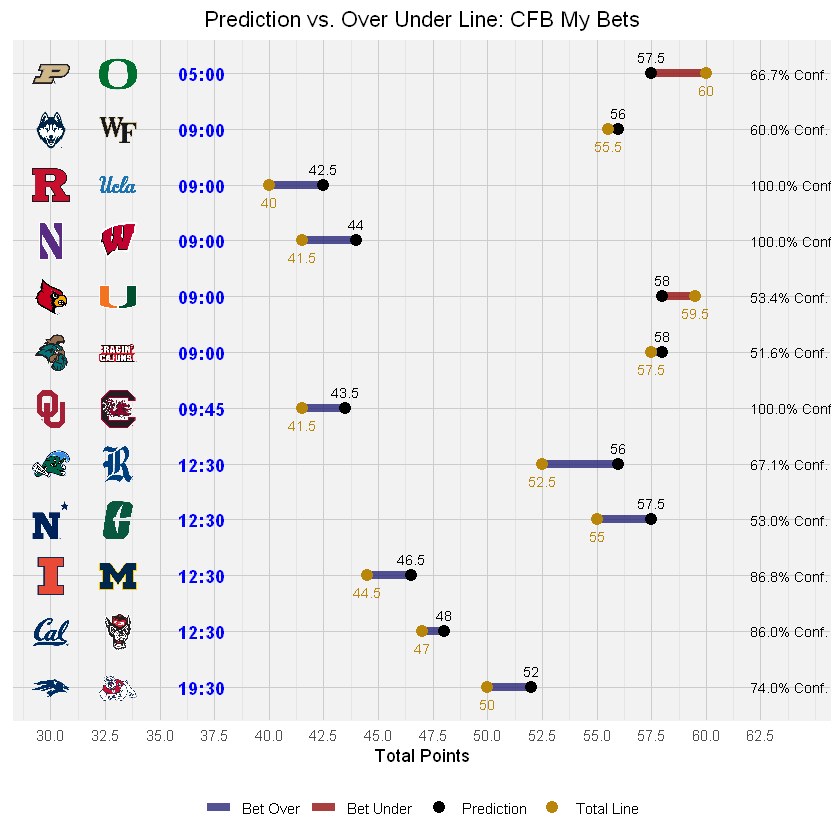

In [82]:
my_bets_one
ggsave("my_bets_one.png", plot=my_bets_one, width=10, height=8, dpi=300)

In [83]:
my_two <- read_csv('my_bets_two.csv', show_col_types=FALSE)
my_two$time <- as.character(my_two$time)
my_two$time <- sub(":00$", "", my_two$time)

New names:
• `` -> `...1`


In [84]:
my_two$time <- ifelse(is.na(my_two$time), "00:00", my_two$time)
my_two$time <- format(as.POSIXct(my_two$time, format = "%H:%M"), "%H:%M")
my_two$numeric_time <- as.numeric(substr(my_two$time, 1, 2)) +
                               as.numeric(substr(my_two$time, 4, 5)) / 60
my_two$home_team <- reorder(my_two$home_team, -my_two$numeric_time)

my_bets_two <- ggplot(my_two, aes(x = prediction, y = home_team)) +
    geom_segment(aes(
    x = pmin(total_line, prediction),
    xend = pmax(total_line, prediction),
    y = home_team,
    yend = home_team,
    color = ifelse(prediction > total_line, "Bet Over", "Bet Under")
    ), linewidth = 2.5, alpha = 0.75) +
    geom_point(aes(color = "Prediction"), size = 3) +
    geom_point(aes(x = total_line, y = home_team, color = "Total Line"), size = 3) +
    geom_text(aes(x = prediction, y = home_team, label = round(prediction, 1)),
            color = "black", vjust = -1, size = 3) +
    geom_text(aes(x = total_line, y = home_team, label = round(total_line, 1)),
            color = "#b8860b", vjust = 2, size = 3) +
    
    # Use cfbplotR logos instead of nflplotR logos
    geom_cfb_logos(aes(x = min(total_line) - 10, team = home_team),
                 width = 0.06, height = 0.06) +
    geom_cfb_logos(aes(x = min(total_line) - 6.95, team = away_team),
                 width = 0.06, height = 0.06) +
    geom_text(aes(x = min(total_line) - 2, y = home_team, label = time),
            data = my_two, color = "blue", hjust = 1, size = 3.75, fontface="bold") +
    
    geom_text(aes(x = max(total_line, prediction) + 2,
                y = home_team,
                label = sprintf("%.1f%% Conf.", prob_correct_pred * 100)),
            data = my_two, color = "black", hjust = 0, size = 3) +
    
    labs(
    title = "Prediction vs. Over Under Line: CFB My Bets",
    x = "Total Points",
    y = NULL,
    color = NULL
    ) +
    scale_color_manual(values = c("Prediction" = "black", "Total Line" = "#b8860b",
                                "Bet Over" = "midnightblue", "Bet Under" = "darkred")) +
    scale_x_continuous(
    breaks = seq(30, max(my_two$total_line, my_two$prediction) + 4, by = 2.5),
    limits = c(min(my_two$total_line) - 10, max(my_two$total_line, my_two$prediction) + 4)
    ) +
    theme_minimal() +
    theme(
    axis.text.y = element_blank(),
    panel.background = element_rect(fill = "grey95", color = "grey95"),
    plot.background = element_rect(fill = "white", color = "white"),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_line(color = "gray90"),
    legend.position = "bottom",
    plot.title = element_text(hjust = 0.5)
    )

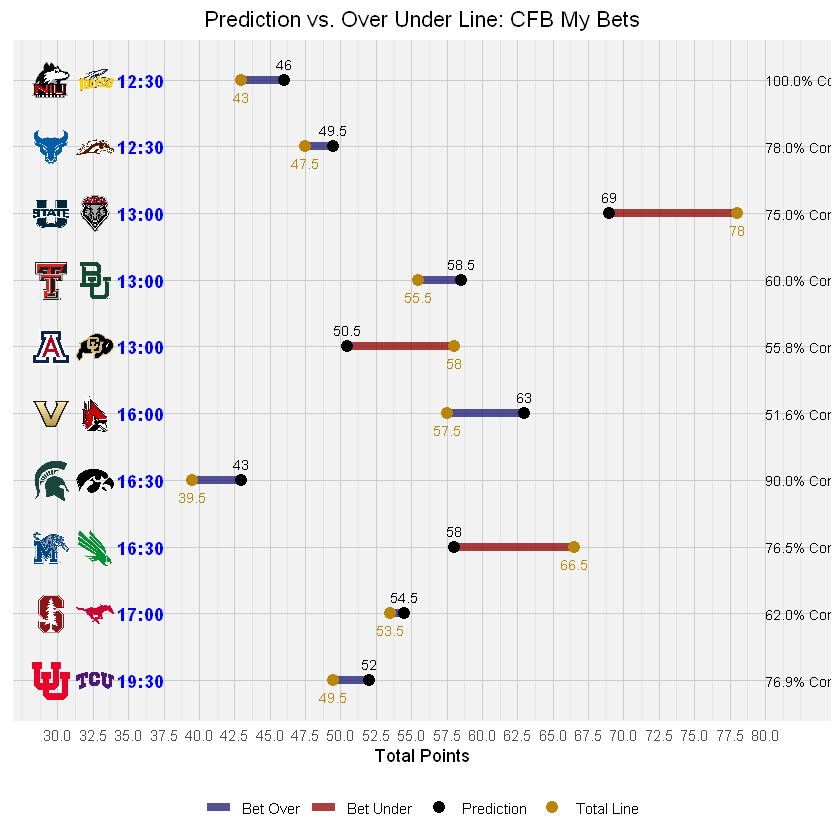

In [85]:
my_bets_two
ggsave("my_bets_two.png", plot=my_bets_two, width=10, height=8, dpi=300)